In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import math
import matplotlib
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
import pickle
#important for text to be detected when importing saved figures into illustrator
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

In [ ]:
rootpath = r"...\Data\Figure 1 and S1"
figurepath = os.path.join(rootpath,"figure")
metapath = os.path.join(rootpath,"meta")
datapath = os.path.join(rootpath,"data")
statspath = os.path.join(rootpath,"stats")
for x in [figurepath,datapath,statspath]:
    if not os.path.exists(x):
        os.mkdir(x)

In [4]:
# Load the meta data
female_self_pacaed_sexual_behavior_meta = pd.read_csv(os.path.join(metapath,'FigureS1_meta.csv'),index_col = False)

In [ ]:
# Excel file to store statistical values for manuscript
manuscript_statistic_filepath = os.path.join(r"...\meta","manuscript_statistic.csv")
manuscript_statistic_file = pd.read_csv(manuscript_statistic_filepath,index_col = False)

# Figure S1A

In [6]:
# Figure label
figlabel = 'FigureS1A'
variable = 'Number_of_Isolation_zone_entry_per_10min'


In [7]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"group_df_virgin_SE.csv"),index_col = None)

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_51796\3833695590.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = group_df[group_df.State == 'Pre_Ejaculation'],\


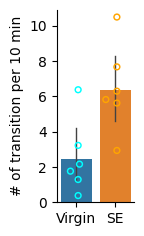

In [8]:

fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.swarmplot(data = group_df[group_df.State == 'Pre_Ejaculation'],\
            x = 'Estrus_state',y = variable,order = ['Virgin','SE'],ax = axs,
            palette = ['cyan','orange'], marker="$\circ$", ec="face",s = 8)
sns.barplot(data = group_df[group_df.State == 'Pre_Ejaculation'],\
              x = 'Estrus_state',y = variable,order = ['Virgin','SE'],ax = axs,errwidth = 1)
#axs.set_ylim(0,20)
sns.despine()
axs.set_ylabel('# of transition per 10 min')
axs.set_xlabel('')
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')     


In [9]:
#perform two-way mannwhitneyu
group1 = 'Virgin'
group2 = 'SE'

mannwhitneyu_stats = mannwhitneyu(x = group_df[(group_df.State == 'Pre_Ejaculation')&(group_df.Estrus_state == group1)][variable].values,
        y = group_df[(group_df.State == 'Pre_Ejaculation')&(group_df.Estrus_state == group2)][variable].values)

# Extract the test statistic and p-value
statistic,pvalue = mannwhitneyu_stats


print(variable,pvalue)



# Save the mannwhitneyu results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_mannwhitneyu.pickle'), 'wb') as handle:
    pickle.dump(mannwhitneyu_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_1 = len(group_df[(group_df.State == 'Pre_Ejaculation')&(group_df.Estrus_state == group1)])
n_2 = len(group_df[(group_df.State == 'Pre_Ejaculation')&(group_df.Estrus_state == group2)])

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Number_of_Isolation_zone_entry_per_10min 0.04112554112554113


# Figure S1B

In [10]:
# Figure label
figlabel = 'FigureS1B'
variable = 'Time_in_Isolation_zone_per_10min'


In [11]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"group_df_virgin_SE.csv"),index_col = None)

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_51796\3467355736.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = group_df[group_df.State == 'Pre_Ejaculation'],\
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


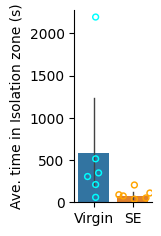

In [12]:

fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.swarmplot(data = group_df[group_df.State == 'Pre_Ejaculation'],\
            x = 'Estrus_state',y = variable,order = ['Virgin','SE'],ax = axs,
            palette = ['cyan','orange'], marker="$\circ$", ec="face",s = 8)
sns.barplot(data = group_df[group_df.State == 'Pre_Ejaculation'],\
              x = 'Estrus_state',y = variable,order = ['Virgin','SE'],ax = axs,errwidth = 1)
#axs.set_ylim(0,20)
sns.despine()
axs.set_ylabel('Ave. time in Isolation zone (s)')
axs.set_xlabel('')
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')     


In [13]:
#perform two-way mannwhitneyu
group1 = 'Virgin'
group2 = 'SE'

mannwhitneyu_stats = mannwhitneyu(x = group_df[(group_df.State == 'Pre_Ejaculation')&(group_df.Estrus_state == group1)][variable].values,
        y = group_df[(group_df.State == 'Pre_Ejaculation')&(group_df.Estrus_state == group2)][variable].values)

# Extract the test statistic and p-value
statistic,pvalue = mannwhitneyu_stats


print(variable,pvalue)



# Save the mannwhitneyu results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_mannwhitneyu.pickle'), 'wb') as handle:
    pickle.dump(mannwhitneyu_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_1 = len(group_df[(group_df.State == 'Pre_Ejaculation')&(group_df.Estrus_state == group1)])
n_2 = len(group_df[(group_df.State == 'Pre_Ejaculation')&(group_df.Estrus_state == group2)])

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Time_in_Isolation_zone_per_10min 0.025974025974025976


In [14]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)